<section>
<p class="fragment fade-down" data-fragment-index="3">
 <img  src="img/diag.png" width="1200" height="900"> </p>
 <p class="fragment fade-down" data-fragment-index="1"> <b> « Data scientist : Person who is better at statistics than any software engineer and better at software engineering than any statician. » Josh Wills 
     .</b> </p>
</section>


<section>
<p class="fragment fade-down" data-fragment-index="2">
 <img  src="img/rog.jpg"  width="900" height="600"> </p>
  <p class="fragment fade-up" data-fragment-index="1"> <b>How does Roger Federer's performance evolve over time ? </b></p>
</section>



<section>
  <p class="fragment highlight-current-red"> <b>How can we answer that question ? </b></p>
        <p class="fragment fade-down" data-fragment-index="3"> <b>We need a dataset and ....</b></p>
    <p class="fragment fade-down" > <img  src="img/pre.jpg" width="800" height="200"> </p>
</section>

#  Exploring a dataset with pandas and matplotlib

In [64]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [66]:
player = 'Roger Federer'
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'federer.csv?raw=true',
                 parse_dates=['start date'],
                 dayfirst=True)

In [129]:
df.head(3)
#df.shape


,year,tournament,start date,type,surface,draw,atp points,atp ranking,tournament prize money,round,...,player2 return games played,player2 total service points won,player2 total service points total,player2 total return points won,player2 total return points total,player2 total points won,player2 total points total,win,dblfaults,Aces
0,1998,"Basel, Switzerland",1998-10-05,WS,Indoor: Hard,Draw: 32,1,396.0,"$9,800",R32,...,8.0,36.0,50.0,26.0,53.0,62.0,103.0,False,0.019417,0.075472
1,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R32,...,8.0,33.0,65.0,8.0,41.0,41.0,106.0,True,0.000000,0.195122
2,1998,"Toulouse, France",1998-09-28,WS,Indoor: Hard,Draw: 32,59,878.0,"$10,800",R16,...,10.0,46.0,75.0,23.0,73.0,69.0,148.0,True,0.020270,0.109589


In [128]:
@interact(Column=list(df.columns)[1:],n=range(df.shape[0]))
def f(Column=list(df.columns)[1],n=5):
    return df[['year',Column,'ranking','winner']].head(n)


interactive(children=(Dropdown(description='Column', options=('tournament', 'start date', 'type', 'surface', '…

In [69]:
@interact(Column=list(df.columns)[1:],n=range(df.shape[0]))
def f(Column=list(df.columns)[1],n=5):
    return df[['year',Column]].tail(n)

interactive(children=(Dropdown(description='Column', options=('tournament', 'start date', 'type', 'surface', '…

In [70]:
df['win'] = df['winner'] == player
df['win'].tail()

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [71]:
won = 100 * df['win'].mean()
print(f"{player} has won {won:.0f}% of his matches.")

Roger Federer has won 82% of his matches.


In [92]:
date = df['start date']


0      1998-10-05
1      1998-09-28
2      1998-09-28
3      1998-09-28
4      1998-08-24
          ...    
1174   2012-01-16
1175   2012-01-02
1176   2012-01-02
1177   2012-01-02
1178   2012-01-02
Name: start date, Length: 1179, dtype: datetime64[ns]

In [73]:
df['dblfaults'] = (df['player1 double faults'] /
                   df['player1 total points total'])

In [74]:
df['dblfaults'].tail()

1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: dblfaults, dtype: float64

In [75]:
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [76]:
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [93]:
gb = df.groupby('year')
gb['start date'].max()

year
1998   1998-10-05
1999   1999-10-25
2000   2000-11-20
2001   2001-10-29
2002   2002-11-11
2003   2003-11-10
2004   2004-11-15
2005   2005-11-14
2006   2006-11-13
2007   2007-11-12
2008   2008-11-09
2009   2009-11-22
2010   2010-11-21
2011   2011-11-20
2012   2012-11-05
Name: start date, dtype: datetime64[ns]

(0, 0.06363636363636364)

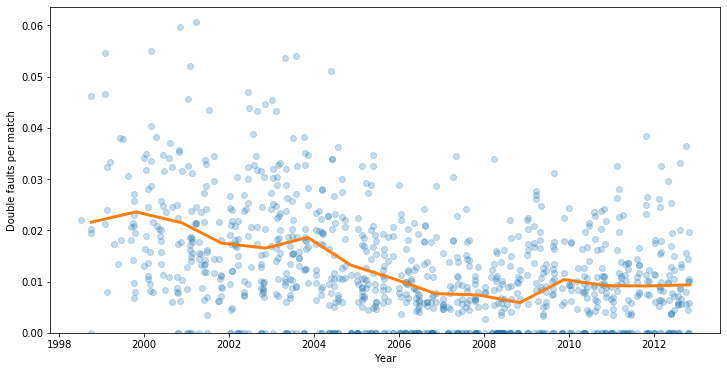

In [117]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots(1, 1)
ax.plot_date(date, df['dblfaults'],
             alpha=.25, lw=0)
ax.plot_date(gb['start date'].max(),
             gb['dblfaults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Double faults per match')
ax.set_ylim(0)

In [123]:
df['Aces'] = (df['player1 aces'] /
                   df['player1 total service points total'])

In [124]:
ab = df.groupby('year')

(0, 0.34363636363636363)

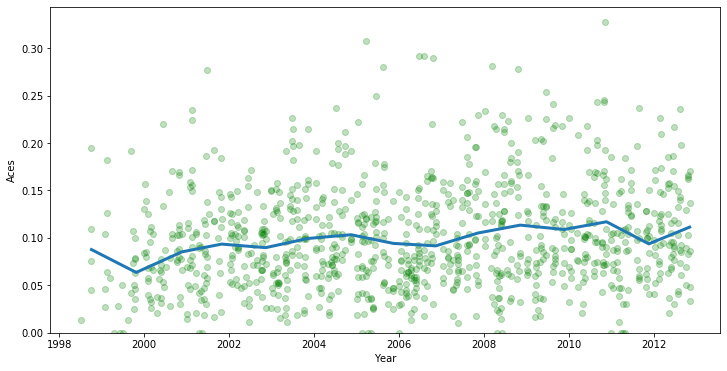

In [125]:
fig, ax = plt.subplots(1, 1)
ax.plot_date(date, df['Aces'],
             alpha=.25, lw=0,color='green')
ax.plot_date(ab['start date'].max(),
             ab['Aces'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Aces')
ax.set_ylim(0)

(0, 0.34363636363636363)

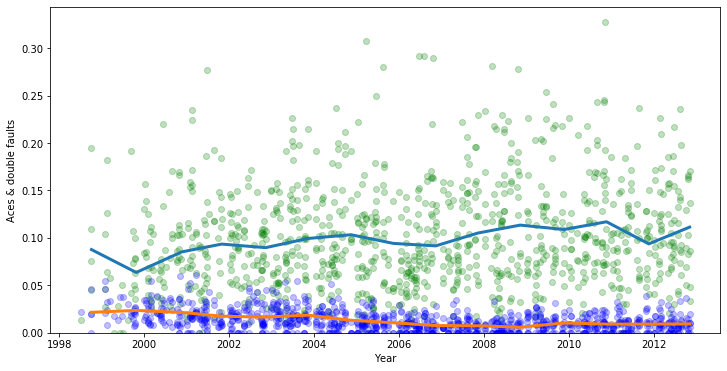

In [126]:
fig, ax = plt.subplots(1, 1)
ax.plot_date(date, df['Aces'],
             alpha=.25, lw=0,color='green')
ax.plot_date(date, df['dblfaults'],
             alpha=.25, lw=0,color='blue')
ax.plot_date(ab['start date'].max(),
             ab['Aces'].mean(), '-', lw=3)
ax.plot_date(gb['start date'].max(),
             gb['dblfaults'].mean(), '-', lw=3)
ax.set_xlabel('Year')
ax.set_ylabel('Aces & double faults')
ax.set_ylim(0)